## Summarize the history of NE Arctic Sites (C1, C4, C11)

- mooring data pulled from ERDDAP (preliminary and/or final)   
- currently on akutan


In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
# mpl.rcParams['pcolor.shading']

In [3]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'

Lets find all erddap datasets that would be associated with C1, C4, C11 for 2017+:   


In [41]:
e = ERDDAP(server=server_url)
dfall = pd.read_csv(e.get_search_url(response='csv', search_for='ckp4a'))

print(dfall['Dataset ID'].values)

['1hr_gridded_datasets_Mooring_12ckp4a_final'
 '1hr_gridded_datasets_Mooring_13ckp4a_final'
 '1hr_gridded_datasets_Mooring_14ckp4a_final'
 '1hr_gridded_datasets_Mooring_15ckp4a_final'
 '1hr_gridded_datasets_Mooring_16ckp4a_final'
 '1hr_gridded_datasets_Mooring_17ckp4a_final'
 '1hr_gridded_datasets_Mooring_18ckp4a_final'
 '1hr_gridded_datasets_Mooring_19ckp4a_final'
 'datasets_Mooring_12ckp4a_final' 'datasets_Mooring_13ckp4a_final'
 'datasets_Mooring_14ckp4a_final' 'datasets_Mooring_15ckp4a_final'
 'datasets_Mooring_16ckp4a_final' 'datasets_Mooring_17ckp4a_final'
 'datasets_Mooring_18ckp4a_final' 'datasets_Mooring_19ckp4a_final'
 'ADCP_Mooring_14ckp4a_final' 'ADCP_Mooring_15ckp4a_final'
 'ADCP_Mooring_16ckp4a_final' 'ADCP_Mooring_17ckp4a_final'
 'ADCP_Mooring_18ckp4a_final' 'datasets_Mooring_14ckp4a_preliminary'
 'datasets_Mooring_15ckp4a_preliminary'
 'datasets_Mooring_16ckp4a_preliminary'
 'datasets_Mooring_17ckp4a_preliminary'
 'datasets_Mooring_18ckp4a_preliminary'
 'datasets_Moorin

1hr_gridded_datasets_Mooring_12ckp4a_final
1hr_gridded_datasets_Mooring_13ckp4a_final
1hr_gridded_datasets_Mooring_14ckp4a_final
1hr_gridded_datasets_Mooring_15ckp4a_final
1hr_gridded_datasets_Mooring_16ckp4a_final
1hr_gridded_datasets_Mooring_17ckp4a_final
1hr_gridded_datasets_Mooring_18ckp4a_final
1hr_gridded_datasets_Mooring_19ckp4a_final


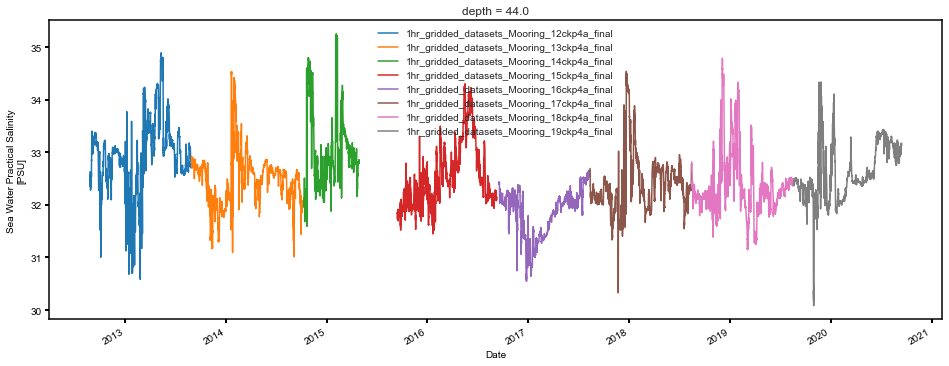

In [42]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(16,5.5))

for dataset_id in sorted(dfall['Dataset ID'].values):
    if ('gridded' in dataset_id):
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'ncCF'
        ds = e.to_xarray(decode_times=True)
        
        print(f'{dataset_id}')
        try:
            ds.salinity.dropna(dim='depth',how='all').plot(ax=ax1,label=dataset_id)
        except:
            print(f'couldnt plot {dataset_id}')
            pass
        
    ax1.legend()

## Use xarray for gridded data (image and convert to csv)

datasets_Mooring_17ckp4a_preliminary


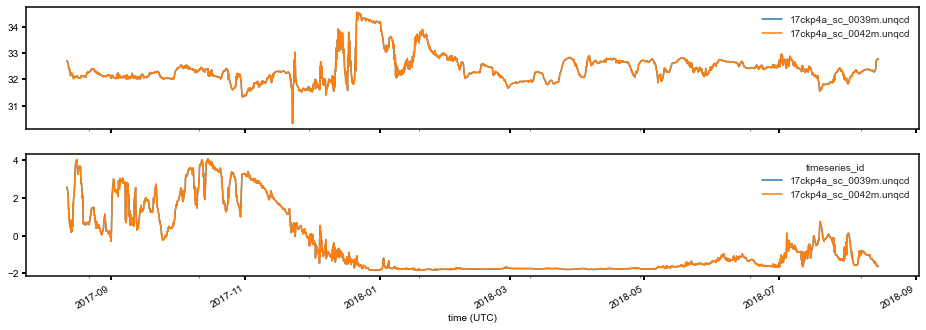

In [46]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, figsize=(16,5.5))

ds_all = pd.DataFrame()
for dataset_id in sorted(['datasets_Mooring_17ckp4a_preliminary']):
# for dataset_id in sorted(['datasets_Mooring_16ckp5a_final','datasets_Mooring_17ckp5a_preliminary','datasets_Mooring_18ckp5a_final']):
    if (not 'gridded' in dataset_id) and (not 'ADCP' in dataset_id):

        
        e.protocol = 'tabledap'
        e.dataset_id=dataset_id
        e.response = 'nc'
        ds = e.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        print(f'{dataset_id}')
        try:
            ds[ds.salinity > 20][['salinity','timeseries_id']].dropna().pivot(columns='timeseries_id', values='salinity').interpolate().plot(ax=ax1)
            ds[ds.salinity > 20][['temperature (degree_C)','timeseries_id']].dropna().pivot(columns='timeseries_id', values='temperature (degree_C)').interpolate().plot(ax=ax2)

            ds_all = pd.concat([ds_all,ds[ds.salinity > 20]])
        except:
            pass
    
#     ax1.set_ylim([ds_all.salinity.median()-ds_all.salinity.std(),ds_all.salinity.median()+ds_all.salinity.std()])
    ax1.legend()

# ds_all[['salinity','temperature (degree_C)','depth (m)']].to_csv('CKP4_TS.csv')